# Cluster the Olivetti Faces Dataset with K-Means

(Notebook adapted from: A.Geron, Hands On ML with Scikit-Learn, Keras und Tensorflow, O'Reilly)

In this exercise we will try to cluster human pictures, in order to identify which picture belong to the same subject/person. 
We will use an unsupervised learning approach, which means we will train without knowing the correct assignment of the pictures (in other words the person have no labels).
As usual, answer the questions/comments and add your code where indicated. Otherwise just try to understand what's happening :-).

About the database: The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each). Load the dataset using the `sklearn.datasets.fetch_olivetti_faces()` function.
For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).

## Libraries and settings

In [1]:
# Libraries
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_olivetti_faces

# Settings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/python_machine_learning_basics/K-Means


## Import data

In [2]:
# Import data
olivetti = fetch_olivetti_faces()

# Show data description
# print(olivetti.DESCR) 

# Data matrix
X = olivetti.data

# Data shape (nrows, ncols)
X.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/vscode/scikit_learn_data


(400, 4096)

## Reduce dimensionality

Since the images are 64x64pixels, the number of features (=number of total pixels) is 4096. This a huge number of variables to check out for clustering. So, for convenience we should first try to see if we can reduce the number of features we feed to k-means. This operation is called "Dimensionality Reduction".

In [3]:
# Use PCA to reduce the dimensionality of the data
pca = PCA(0.99)

# Fit the PCA model to the data
X_pca = pca.fit_transform(olivetti.data)

# Check the number of components
pca.n_components_

260

## Perform k-means clustering

Well done :) we reduced dimensionality quite a lot!

Let's now perform k-means on this subset of features: X_pca  

Use the function https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and the advices given in the class.  

Remember that you have to define the number of clusters k.

How to set k? Start with a "reasonable" guess and qualitatively look how good the clustering is. 

Try to change k manually and see if it improves or get worse.

Cluster 0


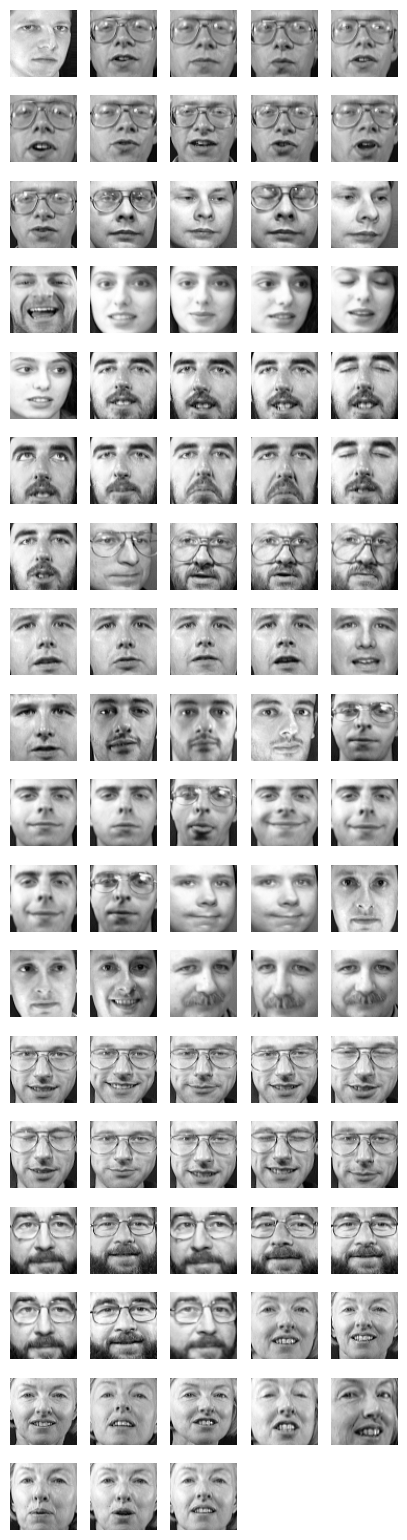

Cluster 1


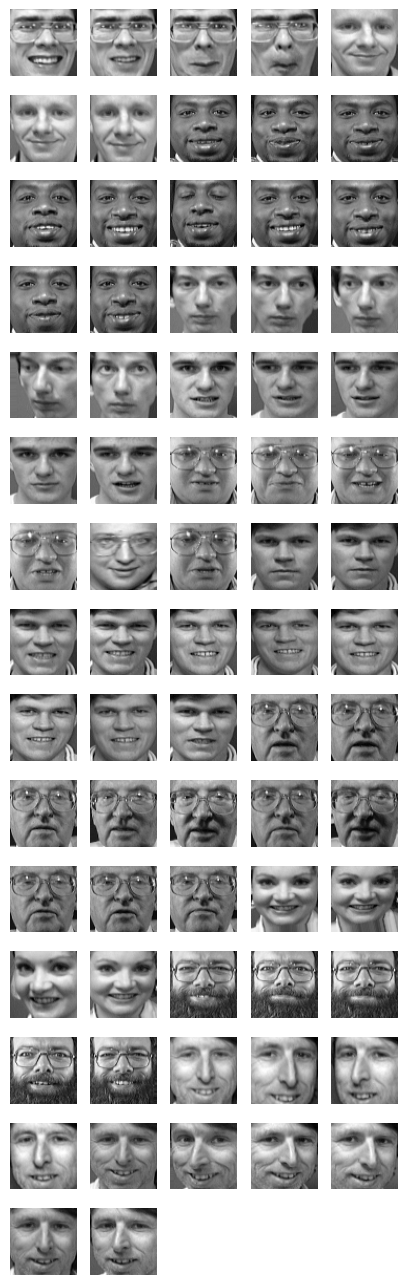

Cluster 2


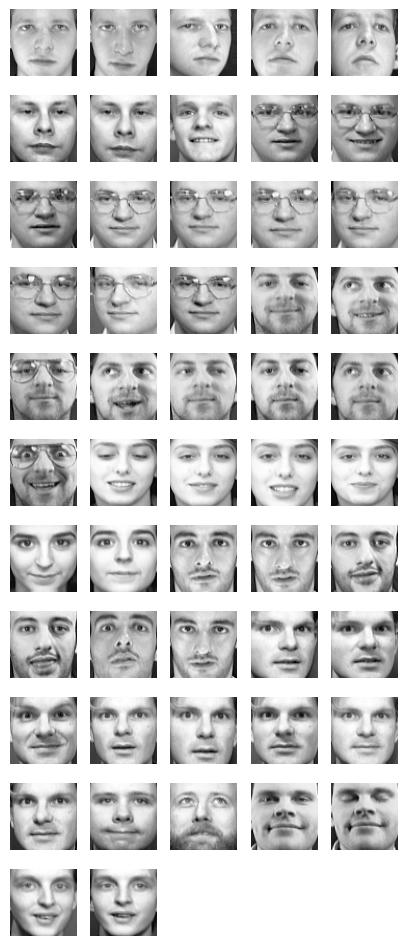

Cluster 3


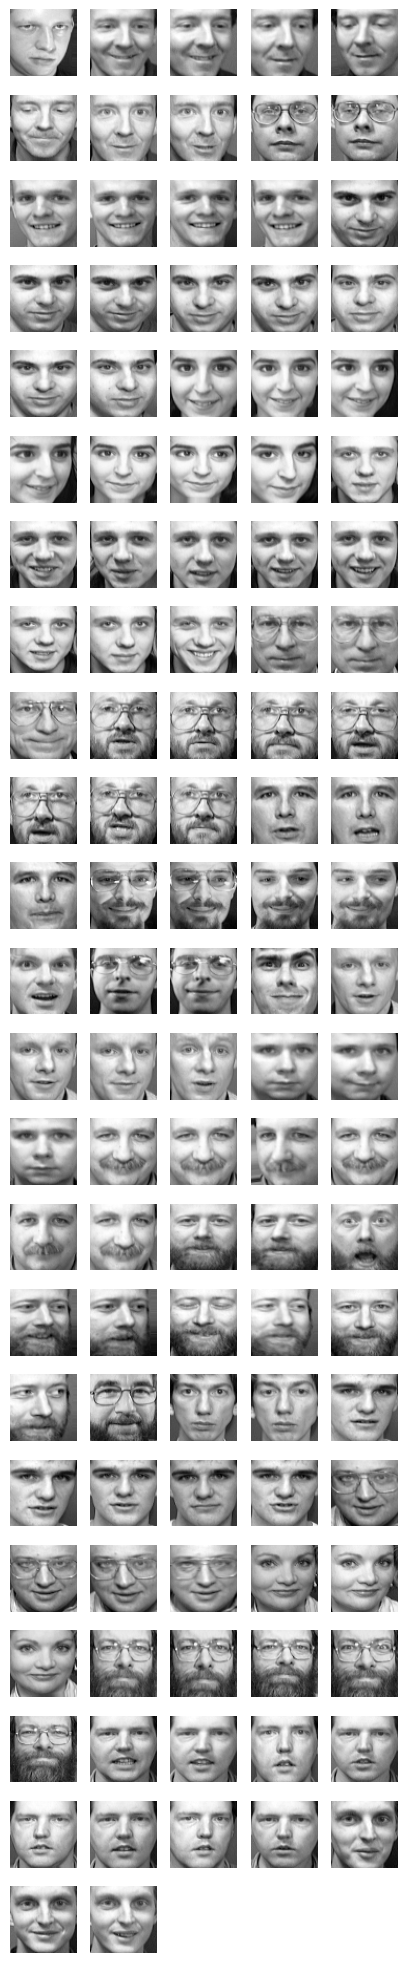

Cluster 4


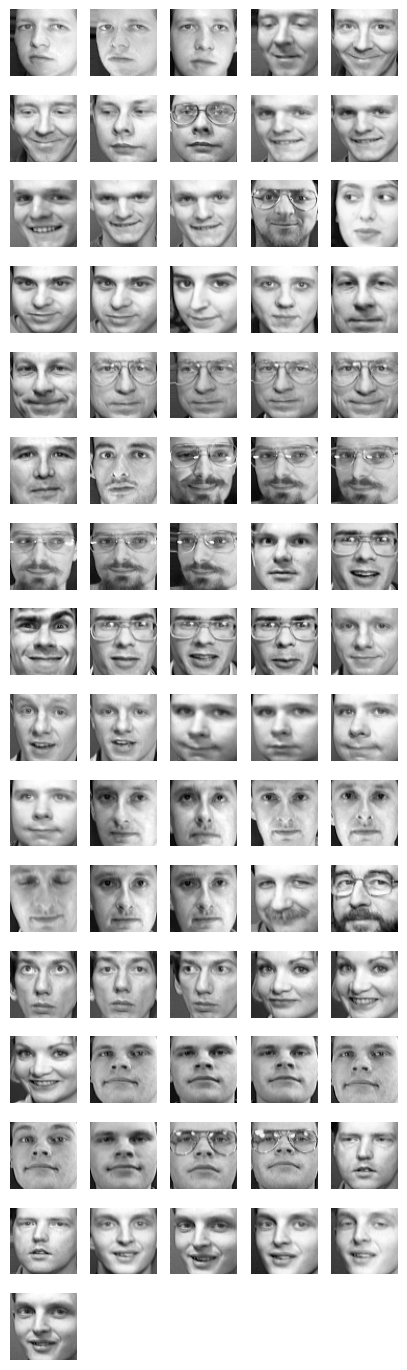

In [4]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=5, random_state=42) ### ADD YOUR CODE HERE ###
kmeans.fit(X_pca)

def plot_faces(faces, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, face in enumerate(faces):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
    plt.show()

for cluster_id in np.unique(kmeans.labels_):
    print("Cluster", cluster_id)
    in_cluster = kmeans.labels_==cluster_id
    faces = X[in_cluster].reshape(-1, 64, 64)
    plot_faces(faces)

What was your best k?

## Use a loop to identify the best k

For a serious approach we should try to identify K through a more robust approach. 
Let's run the k-means algorithm in a loop, every time with a different number of clusters, K. 

In [5]:
 # Feel free to change the range limits or step
k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k)  ### ADD YOUR CODE HERE ###
    kmeans.fit(X_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


## Calculate Intertia (Within-Cluster Sum of Squares, WCSS)  for each run

Let's now evaluate for each of this run the inertia of the model. Luckily, this is part of the Sklearn KMeans function's output (Z.B. kmeans.inertia_) 

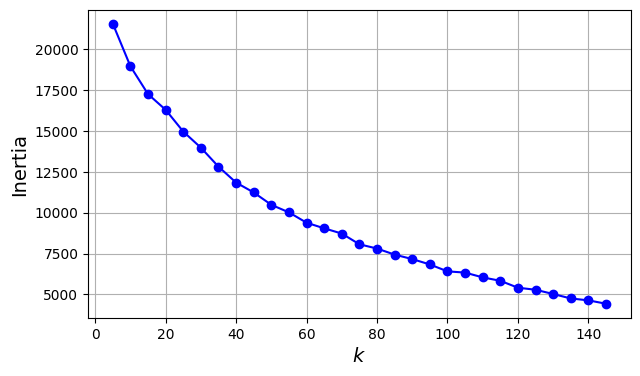

In [6]:
# Calculate inertia for each k
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(7, 4))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.grid()
plt.show()

Can you get from this plot a clear indication on what could be a good value for k?  

Do you see an "elbow"?

## Calculate silhouette score

Let's try with the more sophisticated method called silhouette analysis.

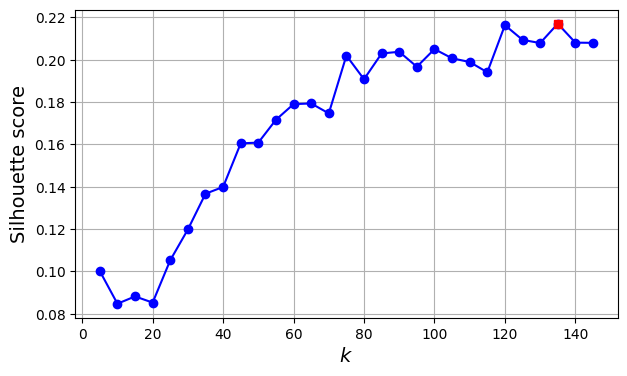

In [7]:
# Calculate silhouette score for each k
silhouette_scores = [silhouette_score(X_pca, model.labels_) for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(7, 4))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.grid()
plt.show()

What is the best value for k according to this method?

In [8]:
print(f"The best k is: {best_k}")

The best k is: 135


It looks like the best number of clusters is quite high. 
How does it compare with your first reasonable guess? 

## Final result

Let's have a direct look of how pictures are grouped according to the best k

In [9]:
# Fit the best k-means model
kmeans = KMeans(n_clusters = 140) ### ADD VALUE OF BEST K HERE ###
kmeans.fit(X_pca)

KMeans(n_clusters=140)

Cluster 0


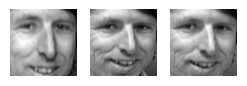

Cluster 1


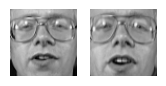

Cluster 2


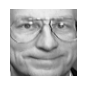

Cluster 3


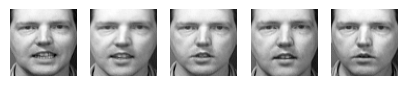

Cluster 4


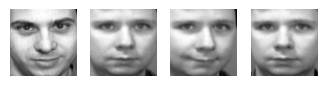

Cluster 5


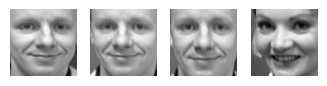

Cluster 6


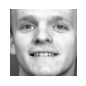

Cluster 7


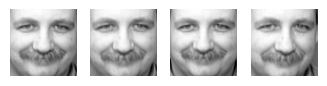

Cluster 8


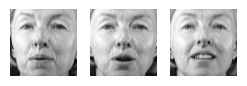

Cluster 9


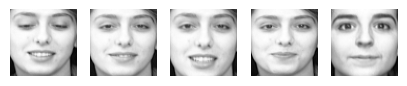

Cluster 10


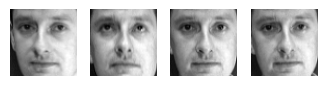

Cluster 11


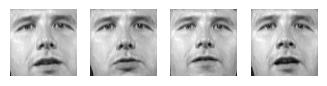

Cluster 12


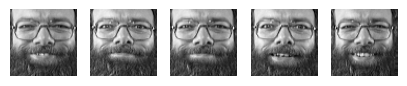

Cluster 13


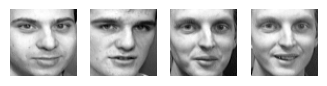

Cluster 14


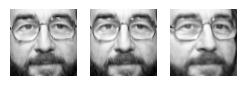

Cluster 15


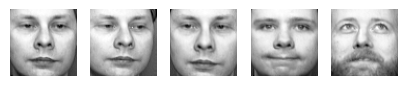

Cluster 16


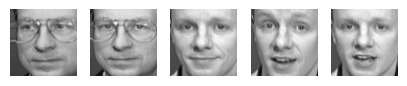

Cluster 17


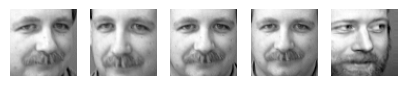

Cluster 18


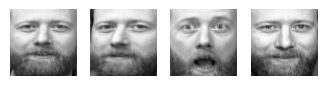

Cluster 19


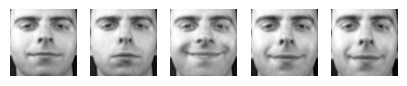

Cluster 20


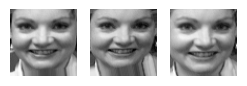

Cluster 21


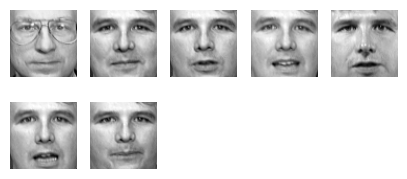

Cluster 22


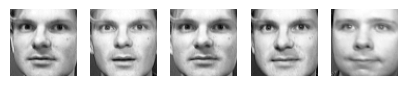

Cluster 23


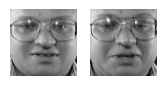

Cluster 24


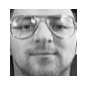

Cluster 25


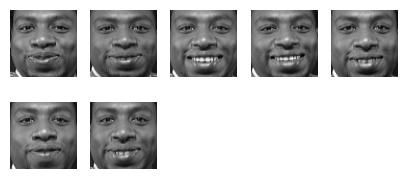

Cluster 26


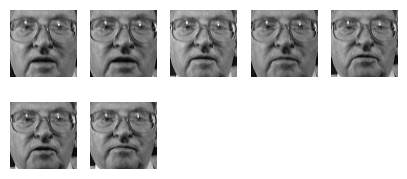

Cluster 27


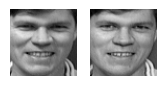

Cluster 28


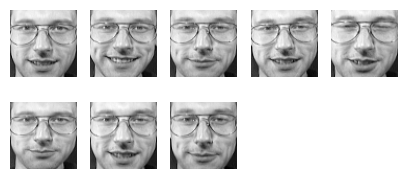

Cluster 29


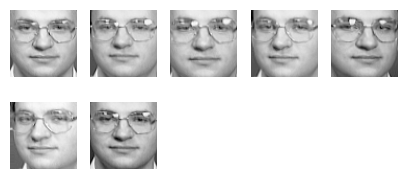

Cluster 30


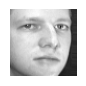

Cluster 31


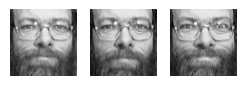

Cluster 32


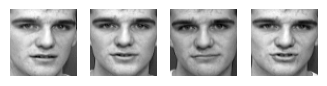

Cluster 33


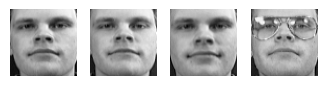

Cluster 34


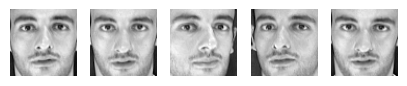

Cluster 35


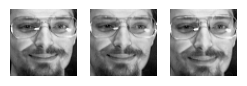

Cluster 36


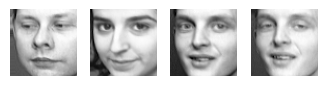

Cluster 37


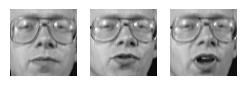

Cluster 38


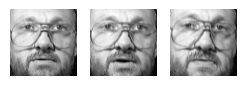

Cluster 39


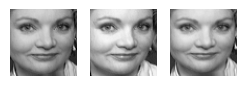

Cluster 40


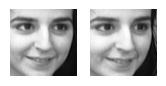

Cluster 41


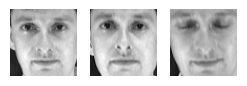

Cluster 42


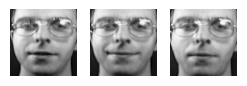

Cluster 43


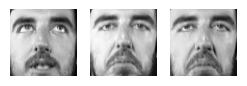

Cluster 44


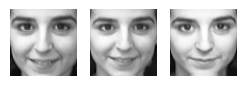

Cluster 45


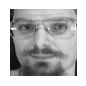

Cluster 46


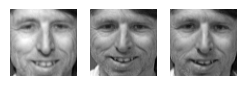

Cluster 47


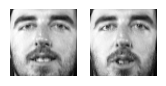

Cluster 48


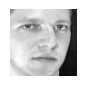

Cluster 49


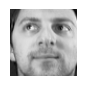

Cluster 50


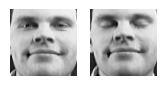

Cluster 51


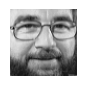

Cluster 52


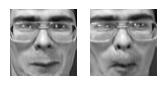

Cluster 53


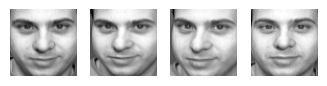

Cluster 54


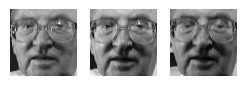

Cluster 55


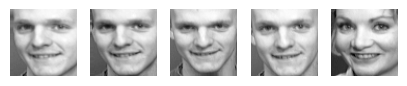

Cluster 56


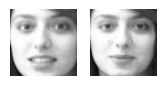

Cluster 57


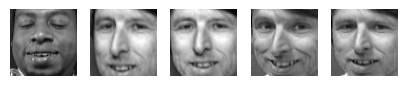

Cluster 58


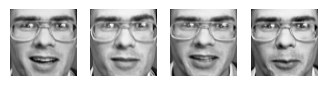

Cluster 59


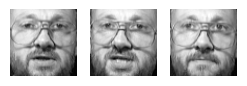

Cluster 60


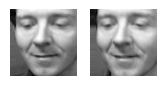

Cluster 61


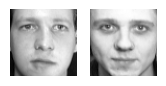

Cluster 62


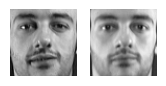

Cluster 63


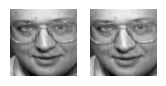

Cluster 64


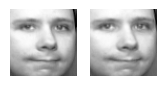

Cluster 65


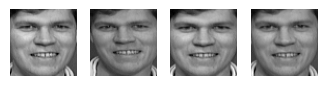

Cluster 66


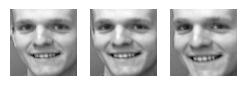

Cluster 67


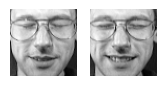

Cluster 68


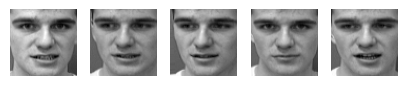

Cluster 69


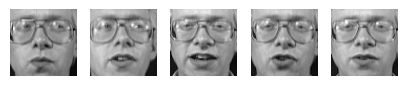

Cluster 70


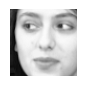

Cluster 71


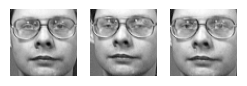

Cluster 72


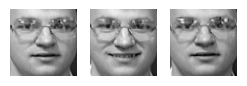

Cluster 73


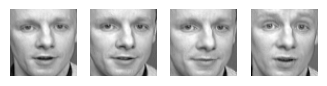

Cluster 74


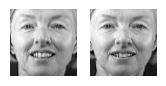

Cluster 75


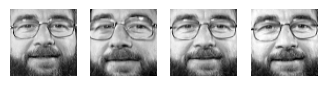

Cluster 76


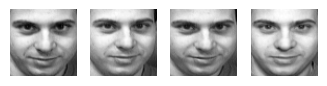

Cluster 77


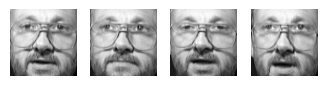

Cluster 78


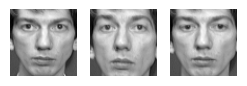

Cluster 79


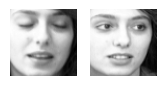

Cluster 80


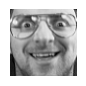

Cluster 81


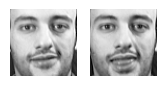

Cluster 82


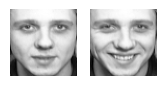

Cluster 83


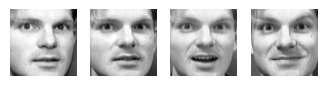

Cluster 84


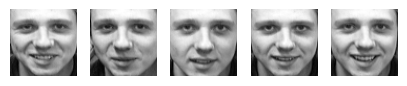

Cluster 85


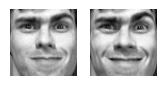

Cluster 86


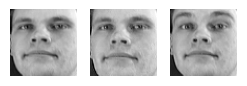

Cluster 87


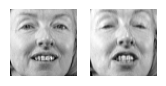

Cluster 88


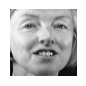

Cluster 89


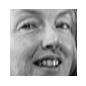

Cluster 90


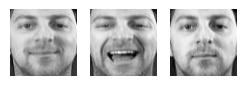

Cluster 91


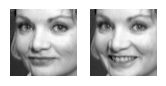

Cluster 92


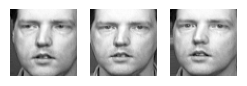

Cluster 93


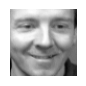

Cluster 94


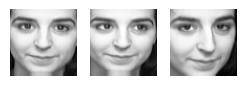

Cluster 95


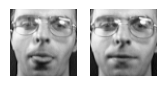

Cluster 96


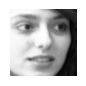

Cluster 97


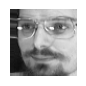

Cluster 98


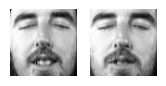

Cluster 99


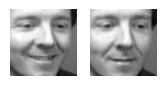

Cluster 100


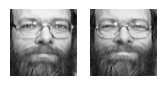

Cluster 101


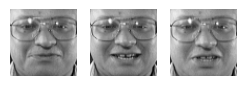

Cluster 102


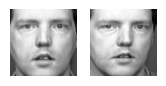

Cluster 103


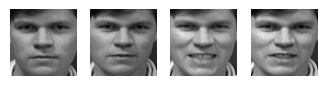

Cluster 104


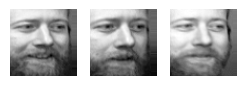

Cluster 105


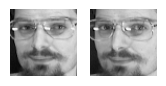

Cluster 106


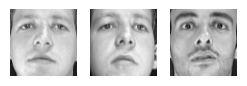

Cluster 107


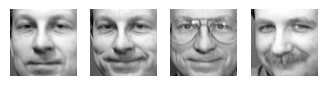

Cluster 108


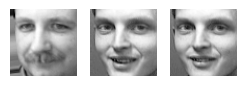

Cluster 109


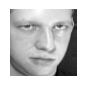

Cluster 110


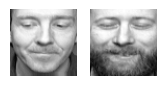

Cluster 111


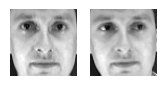

Cluster 112


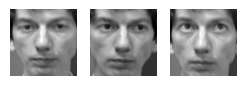

Cluster 113


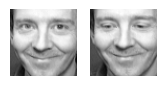

Cluster 114


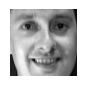

Cluster 115


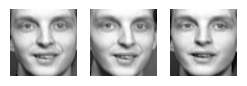

Cluster 116


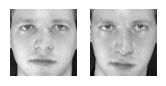

Cluster 117


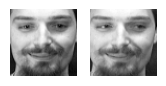

Cluster 118


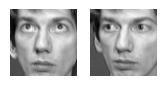

Cluster 119


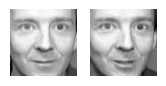

Cluster 120


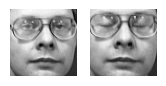

Cluster 121


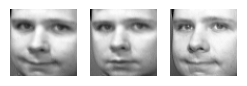

Cluster 122


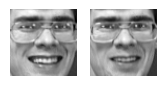

Cluster 123


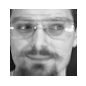

Cluster 124


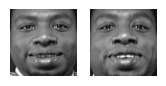

Cluster 125


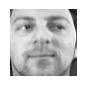

Cluster 126


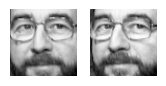

Cluster 127


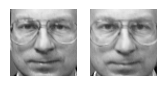

Cluster 128


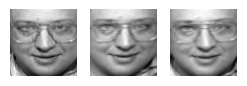

Cluster 129


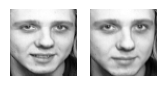

Cluster 130


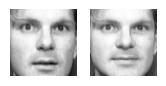

Cluster 131


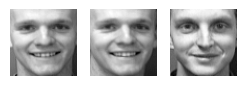

Cluster 132


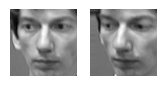

Cluster 133


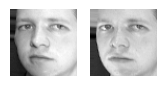

Cluster 134


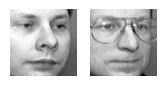

Cluster 135


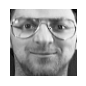

Cluster 136


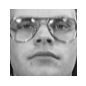

Cluster 137


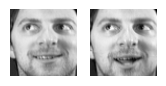

Cluster 138


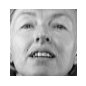

Cluster 139


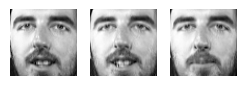

In [10]:
# Plot the faces in each cluster
def plot_faces(faces, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, face in enumerate(faces):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
    plt.show()

for cluster_id in np.unique(kmeans.labels_):
    print("Cluster", cluster_id)
    in_cluster = kmeans.labels_==cluster_id
    faces = X[in_cluster].reshape(-1, 64, 64)
    plot_faces(faces)

Well done :-)

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [11]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1014-azure
Datetime: 2024-09-25 15:32:34
Python Version: 3.11.10
-----------------------------------
